<h1>Group Members:</h1>
<ol>Aditya Kumar</ol>
<ol>Siddharth Bhola</ol>
<ol>Rekha Goverthanam</ol>
<ol>Kailash Umayaorupagam</ol>


In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import warnings

warnings.filterwarnings('ignore')

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)    
    A =(((C.T)/(C.sum(axis=1))).T)    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("green")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [1]:
import pandas as pd
from patsy import dmatrices
from sklearn.model_selection import train_test_split

df = pd.read_csv('crowd.csv')
col = df.columns.values.tolist()
col.remove('y')
col.remove('votes')
col.remove('comments')
x = "+".join(col)
y, X = dmatrices('y ~' + x, df, return_type='dataframe')

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
y_test.y.value_counts()

0.0    1611
1.0     151
Name: y, dtype: int64

<h1>Ridge</h1>

Ridge Accuracy :  0.9114642451759364
Ridge AUC :  0.5


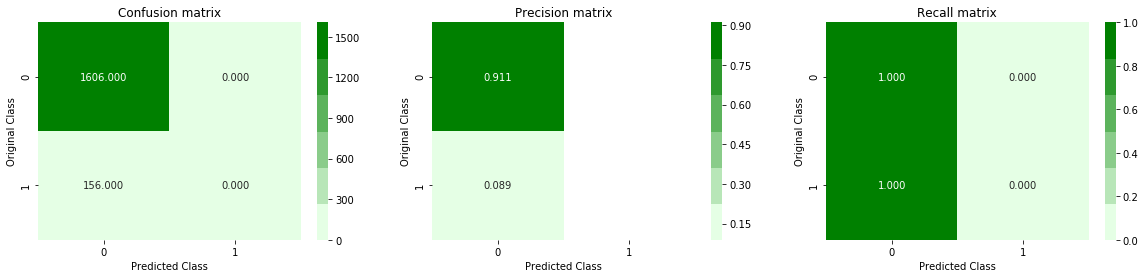

In [40]:
from sklearn.linear_model import RidgeClassifierCV

ridge = RidgeClassifierCV(cv=5)
ridge.fit(x_train, y_train.values.ravel())
ridge_predict = ridge.predict(x_test)
print("Ridge Accuracy : ", accuracy_score(y_test, ridge_predict))  
print("Ridge AUC : ", roc_auc_score(y_test, pd.DataFrame(ridge_predict)))
plot_confusion_matrix(y_test, ridge_predict) 

<h1>Lasso</h1>

Lasso Accuracy :  0.9114642451759364
Lasso AUC :  0.5


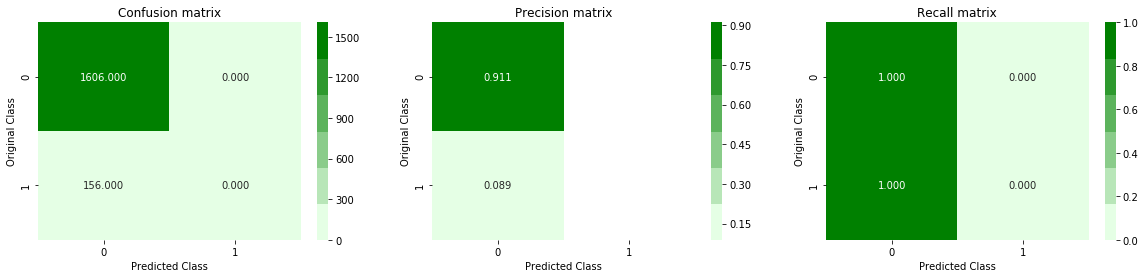

In [41]:
from sklearn.linear_model import LogisticRegressionCV

logistic_regression = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5)
logistic_regression.fit(x_train, y_train.values.ravel())
predictions = logistic_regression.predict(x_test)
print("Lasso Accuracy : ",accuracy_score(y_test, predictions)) 
print("Lasso AUC : ", roc_auc_score(y_test, pd.DataFrame(predictions)))
plot_confusion_matrix(y_test, predictions)

<h1>GAM</h1>

GAM Accuracy :  0.905788876276958
GAM AUC :  0.5169801473392617


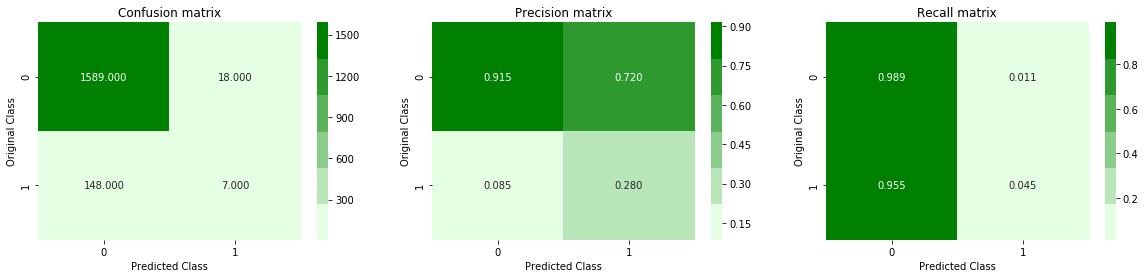

In [22]:
from pygam import LogisticGAM

gam = LogisticGAM()
gam.fit(x_train, y_train.y.astype(bool))
predict_gam = gam.predict(x_test)
predict_gam = np.array(predict_gam, dtype=int)
print("GAM Accuracy : ",accuracy_score(y_test.y.astype(bool), predict_gam))
print("GAM AUC : ", roc_auc_score(y_test.y.astype(bool), pd.DataFrame(predict_gam)))
plot_confusion_matrix(y_test.y.astype(bool), predict_gam)

<h1>Tree</h1>

Tree Accuracy :  0.8530079455164585
Trees AUC :  0.5576404189417887


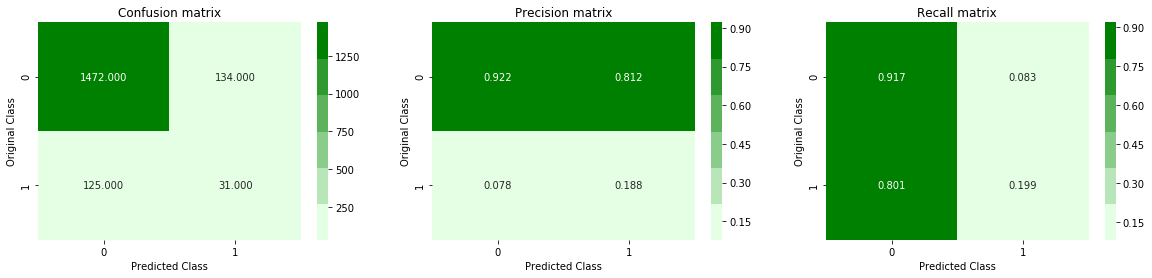

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train.values.ravel())
predict_dtc = dtc.predict(x_test)
print("Tree Accuracy : ",accuracy_score(y_test, predict_dtc))
print("Trees AUC : ", roc_auc_score(y_test, pd.DataFrame(predict_dtc)))
plot_confusion_matrix(y_test, predict_dtc)

<h1>Random Forest</h1>

Random Forest Accuracy :  0.9114642451759364
Random Forest AUC :  0.6118221401240269


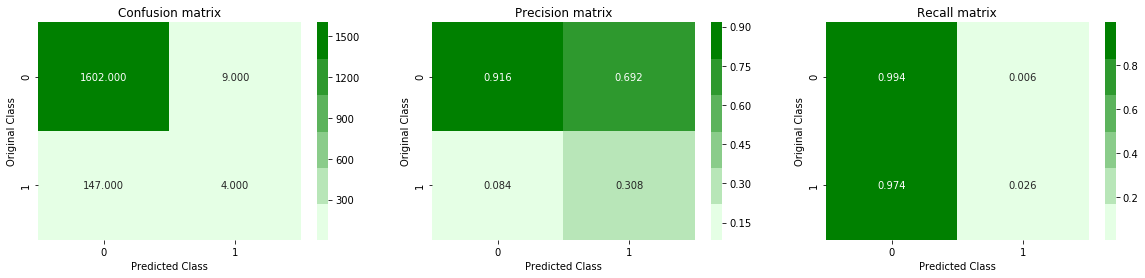

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rclf = RandomForestClassifier(n_estimators=300)
rclf.fit(x_train, y_train.values.ravel())
pred = rclf.predict(x_test)
print("Random Forest Accuracy : ",accuracy_score(y_test, pred)) 
print("Random Forest AUC : ", roc_auc_score(pred, y_test))
plot_confusion_matrix(y_test, pred) 

<h1>GBM</h1>

GBM Accuracy :  0.9108967082860386
GBM AUC :  0.6407262277951934


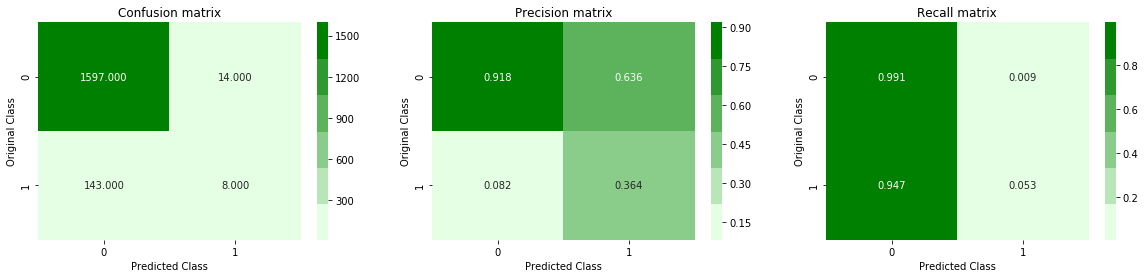

In [5]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(x_train, y_train.values.ravel())
pred = gbm.predict(x_test)
print("GBM Accuracy : ",accuracy_score(y_test, pred))  
print("GBM AUC : ", roc_auc_score(pred, y_test))
plot_confusion_matrix(y_test, pred) 

<h1>Feature Importance</h1>

In [48]:
import pandas as pd
feature_importances = pd.DataFrame({'RF Importance':rclf.feature_importances_, 
                                    'GBM Importance':gbm.feature_importances_, 
                                    'Tree importance':dtc.feature_importances_}, index=x_train.columns,).sort_values('RF Importance', ascending=False)
feature_importances

,RF Importance,GBM Importance,Tree importance
diversity,0.148389,0.385039,0.170909
X8,0.083179,0.091293,0.074841
X3,0.078056,0.060606,0.101650
X11,0.070229,0.079080,0.080430
X6,0.068342,0.043414,0.072823
X10,0.068114,0.034440,0.084006
X7,0.067938,0.048088,0.073128
X1,0.067827,0.045656,0.078759
X4,0.067671,0.041429,0.036115
X2,0.067647,0.036616,0.044897


<h3>Based on the above plots "diversity", "X8","X3" are the strongest predictors for random forest, trees and GBM.</h3>

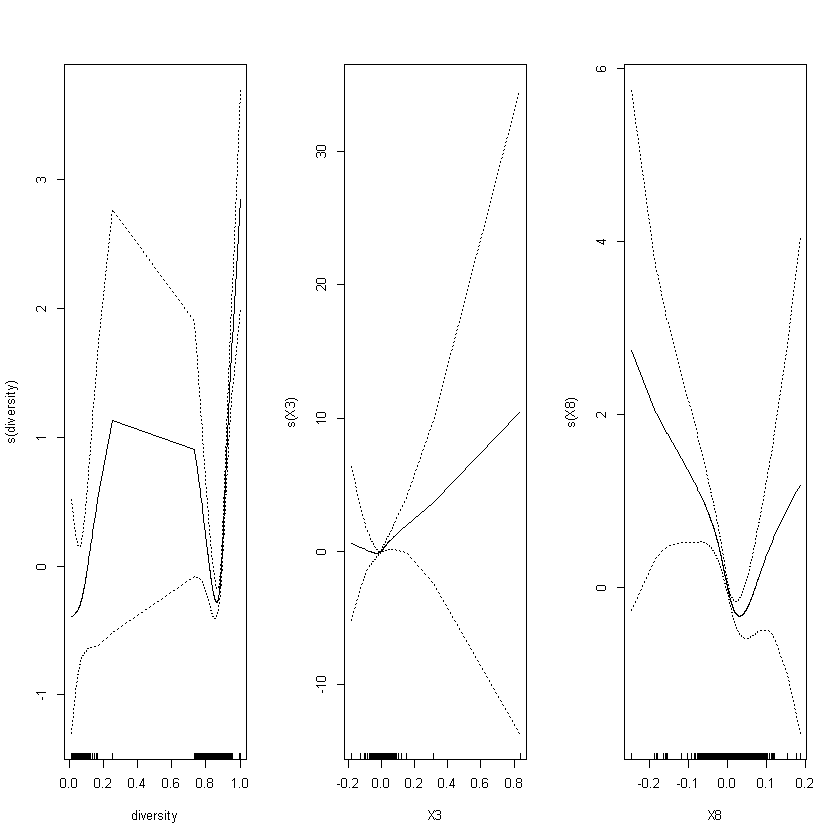

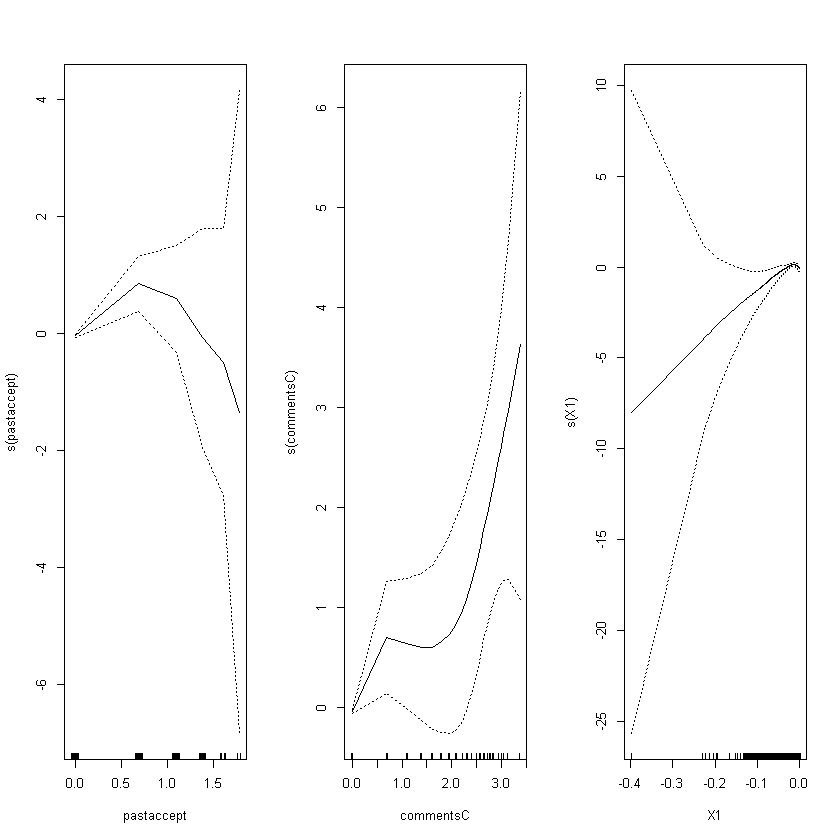

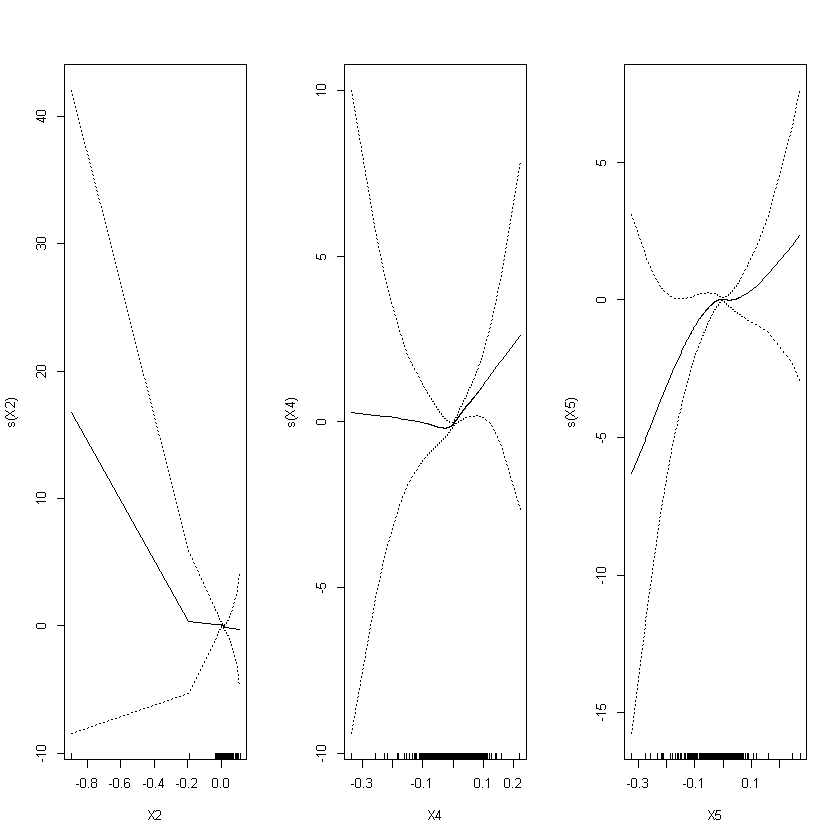

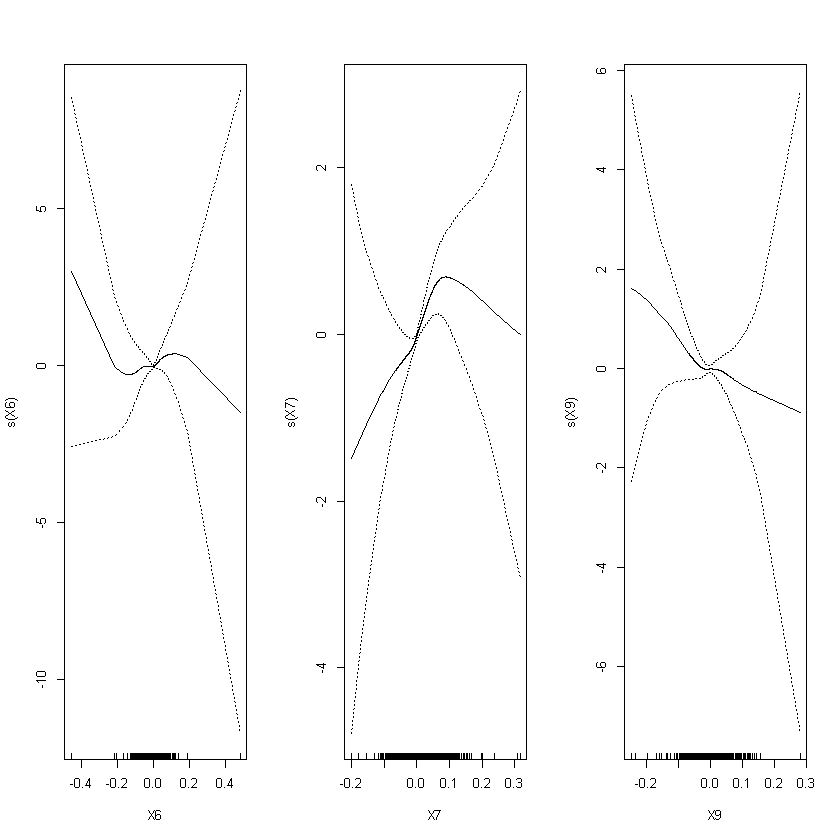

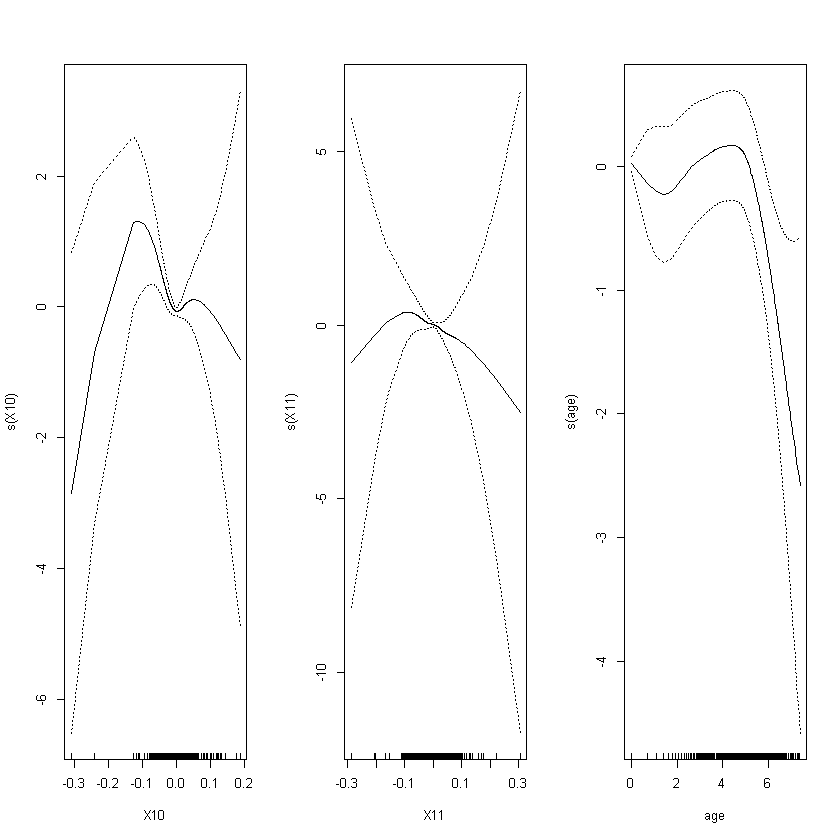

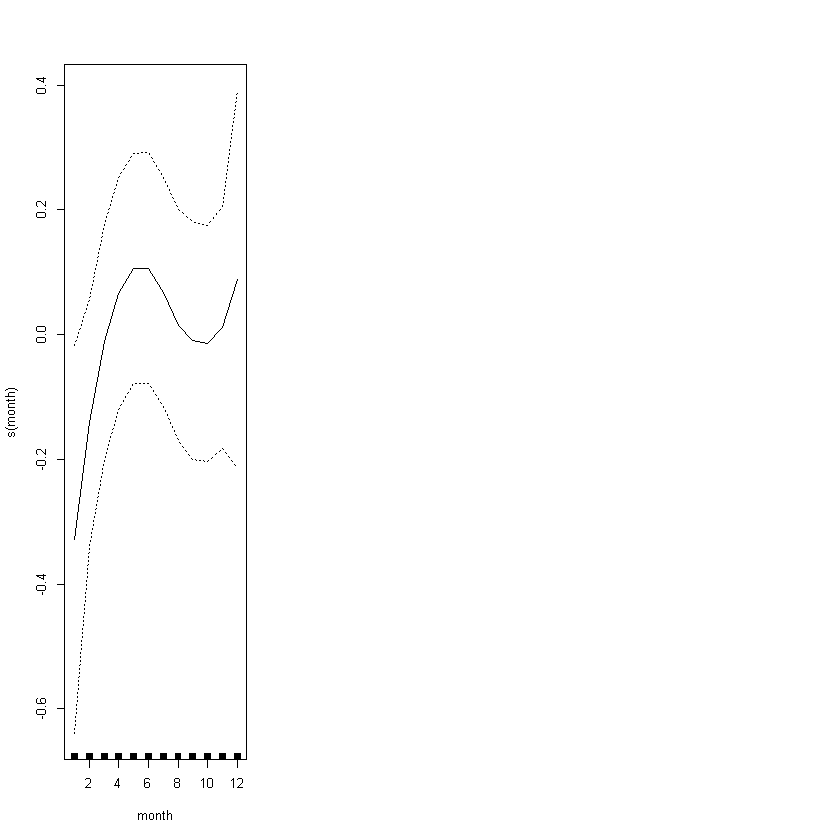

In [2]:
library(gam)

crowd = read.csv("crowd.csv")
set.seed(12345)
train = runif(nrow(crowd))<.7   # pick train/test split

fit.gam = gam(y ~ s(diversity)+s(X3)+s(X8)+s(pastaccept)+s(commentsC)+s(X1)+s(X2)+s(X4)+s(X5)+s(X6)+s(X7)+s(X9)+s(X10)+s(X11)+s(age)+s(month), binomial, crowd[train,])
par(mfrow=c(1,3))
plot(fit.gam, se=T)

<h3>From above graphs we can say below relations for strongest predictors with y.</h3>
<h3>
    <ol>Diversity: Inverted-U followed by U shape returns</ol>
    <ol>X3: Increasing returns</ol>
    <ol>X8: U-shaped returns</ol>
</h3>